Example inspired in the book "Python for Algorithmic Trading" by Yves Hilpisch, chapter 4, section "Strategies based on Simple Moving Averages"

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download  end-of-day (EOD) closing data for the EUR/USD exchange rate, as provided in the csv file under the EOD data file.
raw = pd.read_csv(
    "http://hilpisch.com/pyalgo_eikon_eod_data.csv", index_col=0, parse_dates=True
).dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [3]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [4]:
data = pd.DataFrame(raw["EUR="])
data.rename(columns={"EUR=": "Price"}, inplace=True)
data.head()

,Price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412


In [5]:
# Calculate the simple moving average (SMA) of the closing prices
data["SMA1"] = data["Price"].rolling(window=42).mean()
data["SMA2"] = data["Price"].rolling(window=252).mean()
data

,Price,SMA1,SMA2
Date,,,
2010-01-04,1.4411,NaN,NaN
2010-01-05,1.4368,NaN,NaN
2010-01-06,1.4412,NaN,NaN
2010-01-07,1.4318,NaN,NaN
2010-01-08,1.4412,NaN,NaN
...,...,...,...
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428


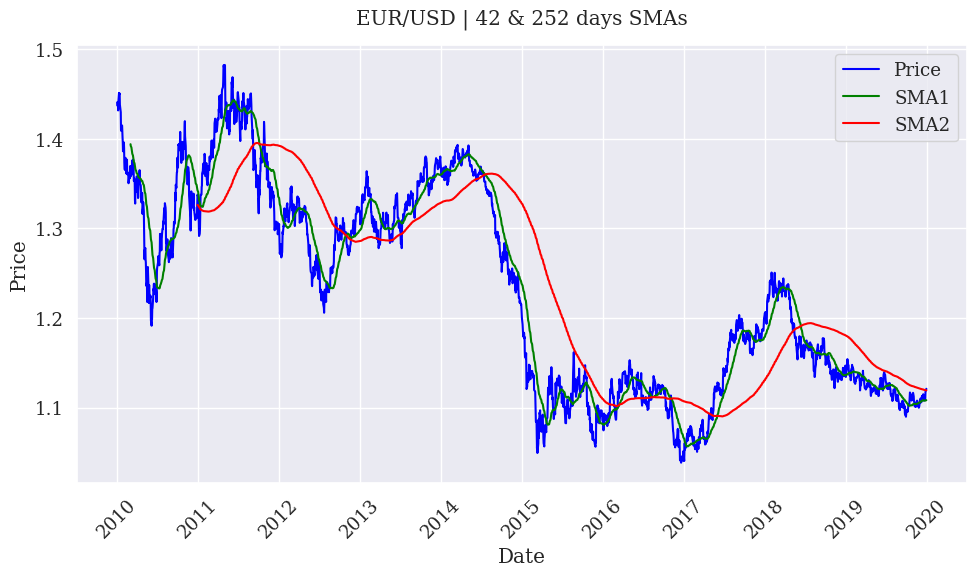

In [7]:
%matplotlib inline
import seaborn as sns

# Configurar o estilo do seaborn
sns.set_theme(style="darkgrid", font="serif", palette="deep")
sns.set_context("notebook", font_scale=1.2)  # Aumenta o tamanho da fonte
plt.figure(figsize=(10, 6))

# Mesmo plot com cores personalizadas
sns.lineplot(data=data, palette=["blue", "green", "red"], dashes=False)

# Configurar o título e labels
plt.title("EUR/USD | 42 & 252 days SMAs", pad=15)
plt.xlabel("Date")
plt.ylabel("Price")

# Ajustar a rotação dos labels do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Ajustar o layout para evitar cortes no gráfico
plt.tight_layout()

The next step is to generate signals, or rather market positionings, based on the rela‐
tionship between the two SMAs. The rule is to go long whenever the shorter SMA is
above the longer one and vice versa. For our purposes, we indicate a long position by 1
and a short position by –1.

In [13]:
data["position"] = np.where(data["SMA1"] > data["SMA2"], 1, -1)
data.dropna(inplace=True)
data

,Price,SMA1,SMA2,position
Date,,,,
2010-12-31,1.3377,1.342579,1.326218,1
2011-01-03,1.3351,1.340945,1.325798,1
2011-01-04,1.3301,1.338940,1.325374,1
2011-01-05,1.3151,1.336448,1.324874,1
2011-01-06,1.3001,1.333995,1.324351,1
...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1
2019-12-26,1.1096,1.107740,1.119529,-1
2019-12-27,1.1175,1.107924,1.119428,-1


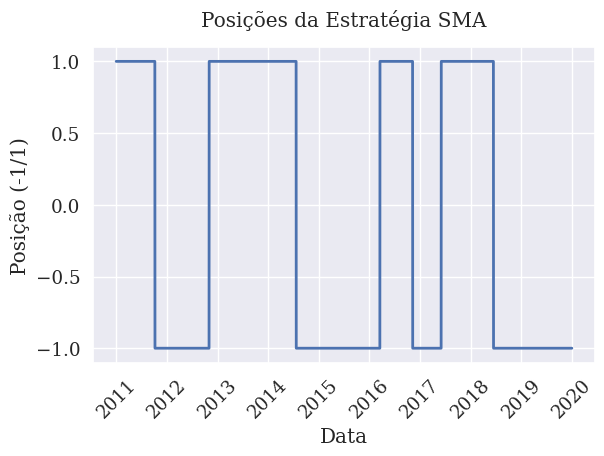

In [15]:
# Mesmo plot com cores personalizadas
sns.lineplot(data=data["position"], linewidth=2)

# Configurar o título e labels
plt.title("Posições da Estratégia SMA", pad=15)
plt.xlabel("Data")
plt.ylabel("Posição (-1/1)")

# Ajustar a rotação dos labels do eixo x
plt.xticks(rotation=45)

# Ajustar o layout
plt.tight_layout()

In [24]:
# Log Returns
data["log_returns"] = np.log(data["Price"] / data["Price"].shift(1))
data

,Price,SMA1,SMA2,position,returns,log_returns,strategy
Date,,,,,,,
2010-12-31,1.3377,1.342579,1.326218,1,NaN,NaN,NaN
2011-01-03,1.3351,1.340945,1.325798,1,-0.001946,-0.001946,-0.001946
2011-01-04,1.3301,1.338940,1.325374,1,-0.003752,-0.003752,-0.003752
2011-01-05,1.3151,1.336448,1.324874,1,-0.011341,-0.011341,-0.011341
2011-01-06,1.3001,1.333995,1.324351,1,-0.011472,-0.011472,-0.011472
...,...,...,...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1,0.000090,0.000090,-0.000090
2019-12-26,1.1096,1.107740,1.119529,-1,0.000811,0.000811,-0.000811
2019-12-27,1.1175,1.107924,1.119428,-1,0.007094,0.007094,-0.007094


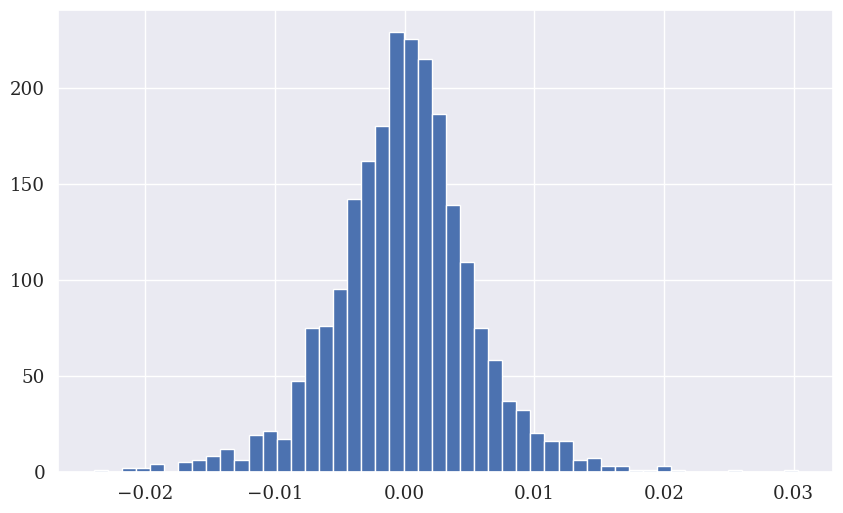

In [33]:
# Plot Log Returns histogram
data["log_returns"].hist(bins=50, figsize=(10, 6))
plt.show()

In [27]:
# log returns of the strategy given the positionings and market returns
data["strategy"] = data["position"].shift(1) * data["log_returns"]

In [28]:
# Sums up the single log return values for both the stock and the strategy (for illustration only)
data[["log_returns", "strategy"]].sum()

log_returns   -0.176731
strategy       0.253121
dtype: float64

In [29]:
# Applies the exponential function to the sum of the log returns to calculate the gross performance.
data[["log_returns", "strategy"]].sum().apply(np.exp)

log_returns    0.838006
strategy       1.288039
dtype: float64

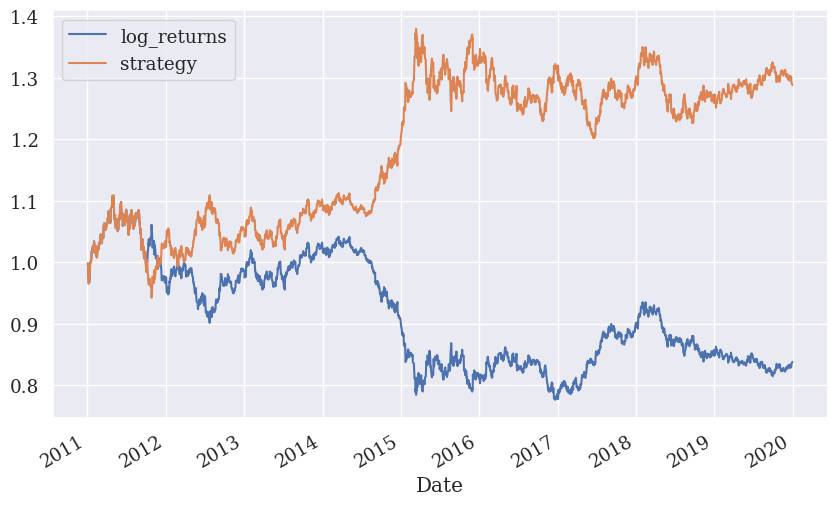

In [34]:
# Calculating the cumulative sum over time with cumsum and, based on this, the cumulative returns by applying the exponential function np.exp() gives a more comprehensive picture of how the strategy compares to the performance of the base financial instrument over time.
# Plotting the cumulative returns
data[["log_returns", "strategy"]].cumsum().apply(np.exp).plot(figsize=(10, 6))
plt.show()

Average, annualized risk-return statistics for both the stock and the strategy are easy
to calculate:

In [36]:
# Calculates the annualized mean return in log space.
data[["log_returns", "strategy"]].mean() * 252

log_returns   -0.019671
strategy       0.028174
dtype: float64

In [37]:
# Calculates the annualized mean return in regular space.
np.exp(data[["log_returns", "strategy"]].mean() * 252) - 1

log_returns   -0.019479
strategy       0.028575
dtype: float64

In [38]:
# Calculates the annualized std of returns in log space.
data[["log_returns", "strategy"]].std() * np.sqrt(252)

log_returns    0.085414
strategy       0.085405
dtype: float64

In [41]:
# Calculates the annualized std of returns in regular space.
(data[["log_returns", "strategy"]].apply(np.exp) - 1).std() * np.sqrt(252)

log_returns    0.085405
strategy       0.085373
dtype: float64

Other risk statistics often of interest in the context of trading strategy performances are the **maximum drawdown** and the **longest drawdown period**. A helper statistic to use in this context is the cumulative maximum gross performance as calculated by the **cummax()** method applied to the gross performance of the strategy.

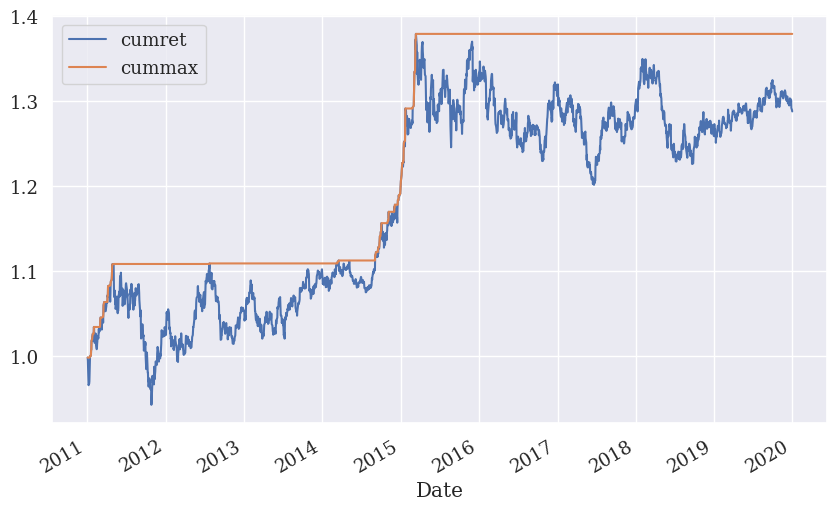

In [44]:
# Defines a new column, cumret, with the gross performance over time.
data["cumret"] = data["strategy"].cumsum().apply(np.exp)
# Defines yet another column with the running maximum value of the gross performance.
data["cummax"] = data["cumret"].cummax()

# Plot the new columns
data[["cumret", "cummax"]].dropna().plot(figsize=(10, 6))
plt.show()

The maximum drawdown is then simply calculated as the maximum of the difference between the two relevant columns. The maximum drawdown in the example is about 18 percentage points:

In [50]:
drawdown = data["cummax"] - data["cumret"]
drawdown

Date
2010-12-31         NaN
2011-01-03    0.000000
2011-01-04    0.003738
2011-01-05    0.014951
2011-01-06    0.026164
                ...   
2019-12-24    0.077022
2019-12-26    0.078078
2019-12-27    0.087278
2019-12-30    0.089816
2019-12-31    0.091312
Length: 2265, dtype: float64

In [ ]:
drawdown.max()

The determination of the longest drawdown period is a bit more involved. It requires those dates at which the gross performance equals its cumulative maximum (that is, where a new maximum is set). This information is stored in a temporary object. Then the differences in days between all such dates are calculated and the longest period is picked out. Such periods can be only one day long or more than 100 days. Here, the longest drawdown period lasts for 596 days—a pretty long period.

In [56]:
# Get differences equal to zero?
zero_drawdown = drawdown[drawdown == 0]
zero_drawdown

Date
2011-01-03    0.0
2011-01-13    0.0
2011-01-14    0.0
2011-01-18    0.0
2011-01-19    0.0
             ... 
2015-03-05    0.0
2015-03-06    0.0
2015-03-10    0.0
2015-03-11    0.0
2015-03-13    0.0
Length: 76, dtype: float64

In [55]:
# Calculates the timedelta values between all index values
periods = (
    zero_drawdown.index[1:].to_pydatetime() - zero_drawdown.index[:-1].to_pydatetime()
)
periods

array([datetime.timedelta(days=10), datetime.timedelta(days=1),
       datetime.timedelta(days=4), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=3), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=5), datetime.timedelta(days=29),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=10), datetime.timedelta(days=1),
       datetime.timedelta(days=2), datetime.timedelta(days=1),
       datetime.timedelta(days=3), datetime.timedelta(days=11),
       datetime.timedelta(days=5), datetime.timedelta(days=2),
       datetime.timedelta(days=6), datetime.timedelta(days=6),
       datetime.timedelta(days=1), datetime.timedelta(days=4),
       datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=1), datetime.timedelta(days=4),
       datetime.timedelta(days=1), datetime.timedel

In [61]:
# Picks out the maximum timedelta value.
periods.max()

datetime.timedelta(days=596)